In [1]:
import pandas as pd
import numpy  as np

In [2]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

--2021-03-09 15:45:35--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 2001:610:430:ffff::16:198, 131.224.250.75
Connecting to data.rivm.nl (data.rivm.nl)|2001:610:430:ffff::16:198|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19_casus_landelijk.csv’ not modified on server. Omitting download.



In [3]:
df_case = pd.read_csv(
    'COVID-19_casus_landelijk.csv',
    sep=';',
    parse_dates=[0, 1],
    infer_datetime_format=True)

df_case.tail(10)

Date_file Date_statistics Date_statistics_type Agegroup  \
1128192 2021-03-09 10:00:00      2021-03-09                  DPL    70-79   
1128193 2021-03-09 10:00:00      2021-03-09                  DPL    50-59   
1128194 2021-03-09 10:00:00      2021-03-09                  DPL    10-19   
1128195 2021-03-09 10:00:00      2021-03-09                  DPL    20-29   
1128196 2021-03-09 10:00:00      2021-03-09                  DPL      0-9   
1128197 2021-03-09 10:00:00      2021-03-09                  DPL    40-49   
1128198 2021-03-09 10:00:00      2021-03-09                  DPL    10-19   
1128199 2021-03-09 10:00:00      2021-03-09                  DON      90+   
1128200 2021-03-09 10:00:00      2021-03-09                  DPL    70-79   
1128201 2021-03-09 10:00:00      2021-03-09                  DON    80-89   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
1128192  Female     Gelderland            Unknown  Unknown            NaN   
1128193    Male  Noord-Holland            Unknown  Unknown            NaN   
1128194  Female   Zuid-Holland            Unknown  Unknown            NaN   
1128195  Female  Noord-Brabant            Unknown  Unknown            NaN   
1128196  Female        Utrecht            Unknown  Unknown            NaN   
1128197    Male   Zuid-Holland            Unknown  Unknown            NaN   
1128198    Male     Overijssel            Unknown  Unknown            NaN   
1128199  Female     Overijssel            Unknown       No            NaN   
1128200  Female   Zuid-Holland            Unknown  Unknown            NaN   
1128201  Female     Overijssel            Unknown       No            NaN   

              Municipal_health_service  
1128192  GGD Noord- en Oost-Gelderland  
1128193               GGD Kennemerland  
1128194            GGD Hollands-Midden  
1128195          GGD Hart voor Brabant  
1128196              GGD Regio Utrecht  
1128197                 GGD Haaglanden  
1128198                 GGD IJsselland  
1128199               GGD Regio Twente  
1128200            GGD Hollands-Midden  
1128201               GGD Regio Twente

In [4]:
# Define period labels
df_case['period'] = df_case['Date_statistics'].dt.isocalendar().year * 100 + df_case['Date_statistics'].dt.isocalendar().week
df_case['period'] = df_case['period'].apply(str)
df_case['period'] = df_case['period'].apply(lambda x: x[:4] + 'W' + x[4:])

#df_case['period'] = (pd.to_datetime('20191230') + pd.to_timedelta((df_case['Date_statistics'].dt.week - 1) * 7, unit='days')).dt.date

# Define group labels
df_case['groups'] = df_case['Sex'] + ' ' + df_case['Agegroup']

df_case.tail(10)

Date_file Date_statistics Date_statistics_type Agegroup  \
1128192 2021-03-09 10:00:00      2021-03-09                  DPL    70-79   
1128193 2021-03-09 10:00:00      2021-03-09                  DPL    50-59   
1128194 2021-03-09 10:00:00      2021-03-09                  DPL    10-19   
1128195 2021-03-09 10:00:00      2021-03-09                  DPL    20-29   
1128196 2021-03-09 10:00:00      2021-03-09                  DPL      0-9   
1128197 2021-03-09 10:00:00      2021-03-09                  DPL    40-49   
1128198 2021-03-09 10:00:00      2021-03-09                  DPL    10-19   
1128199 2021-03-09 10:00:00      2021-03-09                  DON      90+   
1128200 2021-03-09 10:00:00      2021-03-09                  DPL    70-79   
1128201 2021-03-09 10:00:00      2021-03-09                  DON    80-89   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
1128192  Female     Gelderland            Unknown  Unknown            NaN   
1128193    Male  Noord-Holland            Unknown  Unknown            NaN   
1128194  Female   Zuid-Holland            Unknown  Unknown            NaN   
1128195  Female  Noord-Brabant            Unknown  Unknown            NaN   
1128196  Female        Utrecht            Unknown  Unknown            NaN   
1128197    Male   Zuid-Holland            Unknown  Unknown            NaN   
1128198    Male     Overijssel            Unknown  Unknown            NaN   
1128199  Female     Overijssel            Unknown       No            NaN   
1128200  Female   Zuid-Holland            Unknown  Unknown            NaN   
1128201  Female     Overijssel            Unknown       No            NaN   

              Municipal_health_service   period        groups  
1128192  GGD Noord- en Oost-Gelderland  2021W10  Female 70-79  
1128193               GGD Kennemerland  2021W10    Male 50-59  
1128194            GGD Hollands-Midden  2021W10  Female 10-19  
1128195          GGD Hart voor Brabant  2021W10  Female 20-29  
1128196              GGD Regio Utrecht  2021W10    Female 0-9  
1128197                 GGD Haaglanden  2021W10    Male 40-49  
1128198                 GGD IJsselland  2021W10    Male 10-19  
1128199               GGD Regio Twente  2021W10    Female 90+  
1128200            GGD Hollands-Midden  2021W10  Female 70-79  
1128201               GGD Regio Twente  2021W10  Female 80-89

In [5]:
# Pivot to period rows with group columns
df_heat = df_case[df_case['Municipal_health_service'] != ''].pivot_table(
    index='period',
    columns='groups',
    values='Date_statistics',
    aggfunc='count').fillna(0)

# Select columns to use, optionally subset or use relative numbers
#df_heat['total'] = df_heat[df_heat.columns[0:24]].sum(axis=1)
df_heat = df_heat[df_heat.columns[0:24]]#.loc['2020W26':]#.div(df_heat['total'], axis='index')

# Use this for relative growth numbers
#df_heat = df_heat / df_heat.shift()

df_heat.tail(5).loc[::-1].transpose()

period          2021W10  2021W09  2021W08  2021W07  2021W06
groups                                                     
Female 0-9        100.0    878.0   1019.0    864.0    539.0
Female 10-19      177.0   1712.0   2073.0   1674.0   1317.0
Female 20-29      232.0   2245.0   2572.0   2499.0   2066.0
Female 30-39      179.0   1855.0   2426.0   2425.0   1792.0
Female 40-49      210.0   1732.0   2220.0   2175.0   1729.0
Female 50-59      183.0   1911.0   2322.0   2568.0   2195.0
Female 60-69       92.0    993.0   1411.0   1491.0   1315.0
Female 70-79       51.0    558.0    849.0    905.0    765.0
Female 80-89       24.0    320.0    532.0    614.0    727.0
Female 90+          7.0     93.0    180.0    228.0    273.0
Female <50          0.0      0.0      0.0      0.0      2.0
Female Unknown      0.0      0.0      0.0      0.0      0.0
Male 0-9          132.0    934.0   1057.0    924.0    587.0
Male 10-19        182.0   1718.0   1964.0   1692.0   1285.0
Male 20-29        201.0   2196.0   2471.0   2322.0   1946.0
Male 30-39        157.0   1685.0   2123.0   2165.0   1708.0
Male 40-49        172.0   1618.0   2143.0   2041.0   1612.0
Male 50-59        188.0   1885.0   2414.0   2510.0   2214.0
Male 60-69        121.0   1162.0   1569.0   1610.0   1342.0
Male 70-79         80.0    575.0    820.0    854.0    750.0
Male 80-89         15.0    224.0    359.0    448.0    442.0
Male 90+            2.0     37.0     76.0     79.0     95.0
Male <50            0.0      0.0      0.0      0.0      1.0
Male Unknown        0.0      0.0      0.0      0.0      0.0

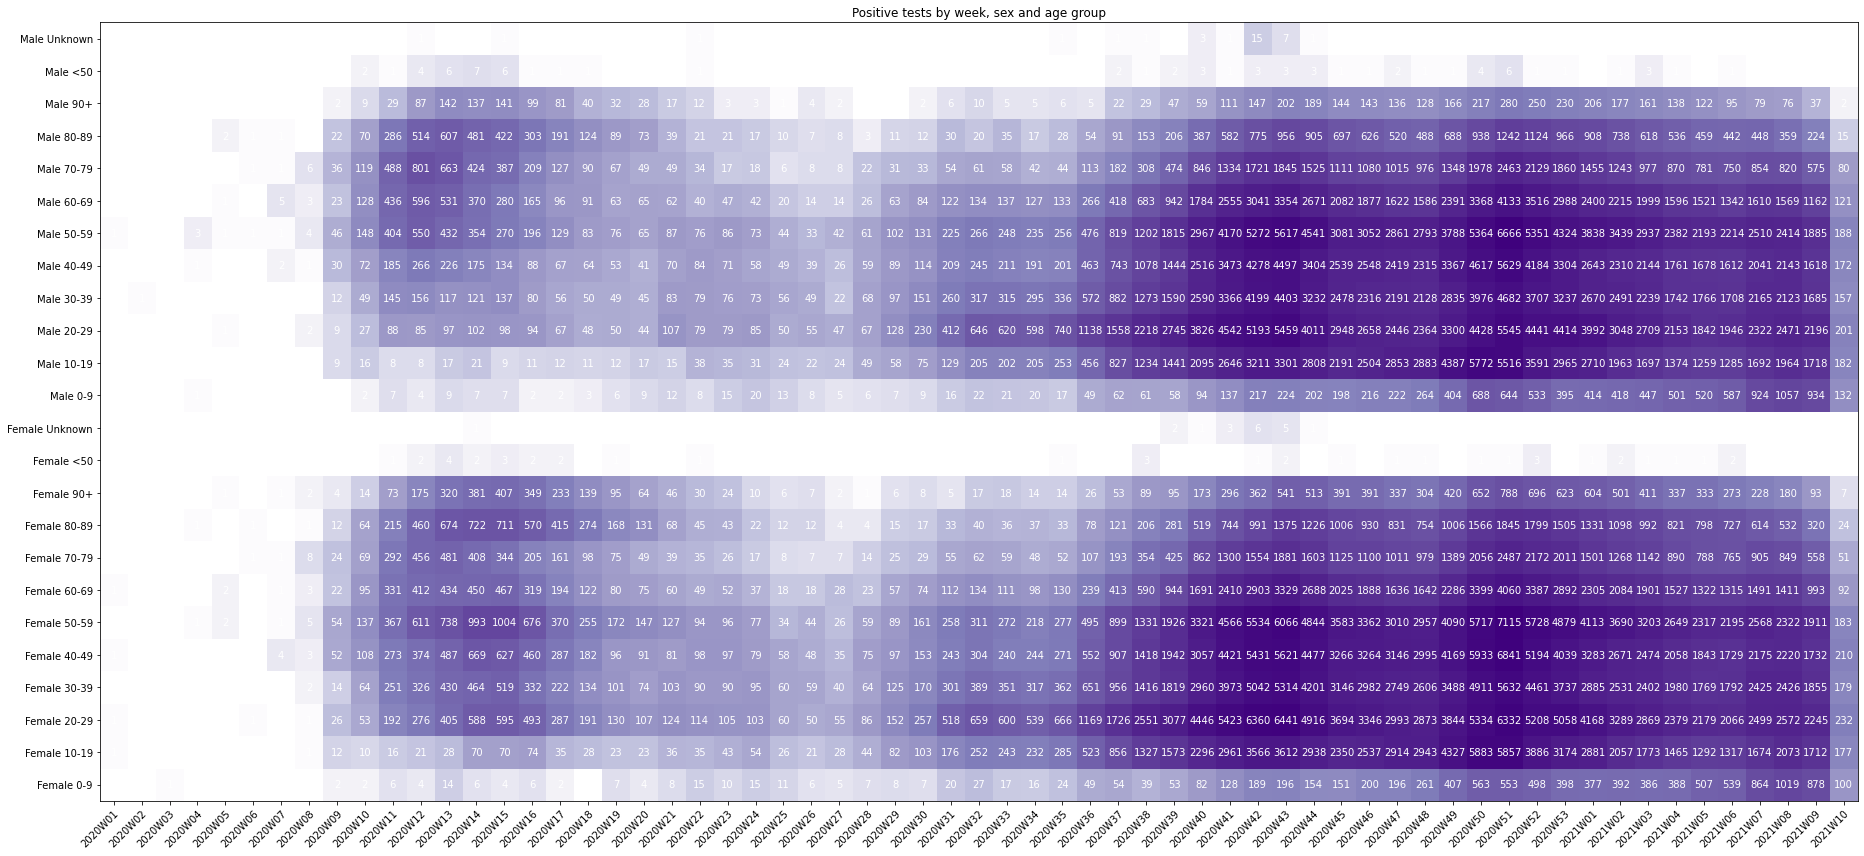

In [6]:
import matplotlib.pyplot as plt

# Define arrays of row and column headers
periods   = df_heat.index
agegroups = df_heat.columns

# Output size may have to be adjusted to data length eventually
fig, ax = plt.subplots(figsize=(26, 12))

# Heatmap on transposed data, X-axis inverted
heatmap = plt.imshow(
    np.log(df_heat[df_heat > 0].loc[:].transpose()),
    cmap='Purples',
    interpolation='nearest',
    aspect='auto',
    origin='lower')

# Every value is an axis tick
ax.set_xticks(np.arange(len(periods)))
ax.set_yticks(np.arange(len(agegroups)))

ax.set_xticklabels(periods)
ax.set_yticklabels(agegroups)

# X labels diagonally
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor")

# Convert dataframe to numpy format
np_heat = df_heat.to_numpy()

# Set numbers as text labels
for i in range(len(periods)):
    for j in range(len(agegroups)):
        text = ax.text(
            i,
            j,
            int(np_heat[i, j]),
            ha="center",
            va="center",
            color="w")

ax.set_title("Positive tests by week, sex and age group")
fig.tight_layout()
plt.show()